In [1]:
# Алгоритм Рабина - Карпа

In [2]:
# Рассмотрим сначала простой поиск

In [1]:
def brute_force_match(word, text):
    # сохраняем длины
    m = len(word)
    n = len(text)

    # счётчик
    counter = 0

    for i in range(0, n - m + 1):
        # переменная-флаг нахождения в строке
        found = True

        for j in range(0, m):
            if word[j] != text[i + j]:
                found = False
                break

        if found:
            counter += 1

    if counter == 0:
        print("Нет совпадений")

    else:
        print ("Слово встречается: ", str(counter), " раз!")

# Примерчики
#brute_force_match("ata","ata")
#brute_force_match("ata","atata")
#brute_force_match("ata","aaaaaaa")
#brute_force_match("ata","")
#brute_force_match("ata","aagcgagcgatatatat")

In [9]:
# Представим, что нам нужно искать совпадения нуклеотида
# в строке в последовательности ДНК (т.е. это будет длинная строка)

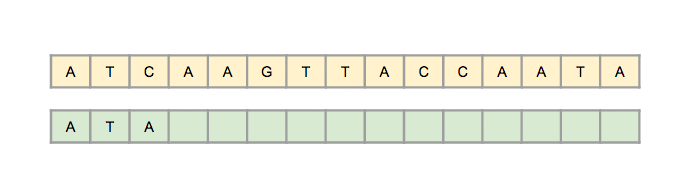

In [7]:
from IPython.display import Image
Image(filename="/home/vic/Desktop/RK-algorithm/rabin-karp-algorithm.gif.png")

In [8]:
class RollingHash:
    def __init__(self, text, sizeWord):
        self.text = text
        self.hash = 0
        self.sizeWord = sizeWord

        for i in range(0, sizeWord):
            # ord maps the character to a number
            # subtract out the ASCII value of "a" to start the indexing at zero
            self.hash += (ord(self.text[i]) - ord("a") + 1) * (26**(sizeWord - i -1))

        # start index of current window
        self.window_start = 0
        # end of index window
        self.window_end = sizeWord

    def move_window(self):
        if self.window_end <= len(self.text) - 1:
            # remove left letter from hash value
            self.hash -= (ord(self.text[self.window_start]) - ord("a") + 1) * 26**(self.sizeWord - 1)
            self.hash *= 26
            self.hash += ord(self.text[self.window_end]) - ord("a") + 1
            self.window_start += 1
            self.window_end += 1

    def window_text(self):
        return self.text[self.window_start:self.window_end]

def rabin_karp(word, text):
    if word == "" or text == "":
        return None
    if len(word) > len(text):
        return None

    rolling_hash = RollingHash(text, len(word))
    word_hash = RollingHash(word, len(word))
    # word_hash.move_window()

    for i in range(len(text) - len(word) + 1):
        if rolling_hash.hash == word_hash.hash:
            if rolling_hash.window_text() == word:
                return i
        rolling_hash.move_window()
    return None

# print rabin_karp("a", "abcdefgh")
# print rabin_karp("d", "abcdefgh")
# print rabin_karp("cupcakes", "balloonsandcupcakes")